# CS 109A/AC 209A/STAT 121A Data Science: Homework 3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 28th, 2016 at 11:59pm

Import libraries

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
import statsmodels.api as sm
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Halperin, Keyan]

### Part (b): Course Number

[STAT 121a]

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

In [29]:
#--------  multiple_linear_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)

def multiple_linear_regression_fit(x_train, y_train):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c

In [30]:
#--------  multiple_linear_regression_score
# A function for evaluating R^2 score and MSE 
# of the linear regression model on a data set
# Input: 
#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_test (n x 1 array of response variable vals in testing data)
# Return: 
#      r_squared (float) 
#      y_pred (n x 1 array of predicted y-vals)

def multiple_linear_regression_score(w, c, x_test, y_test):        
    # Compute predicted labels
    y_pred = np.dot(x_test, w) + c
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_sq = round(1 - sq_error / y_variance, 3)

    return r_sq, y_pred    

In [34]:
# Load train and test data sets
data_train = np.loadtxt('dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('dataset_1_test.txt', delimiter=',', skiprows=1)

# Split predictors from response
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate model
r_sq, _ = multiple_linear_regression_score(w, c, x_test, y_test)

print 'R-squared score on test set:', r_sq 

R-squared score on test set: 0.178


Based on the R-squared value, the linear model with horsepower and highway MPG as predictors does not do a particularly good job predicting automobile prices.

### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

Linear regression with all predictors


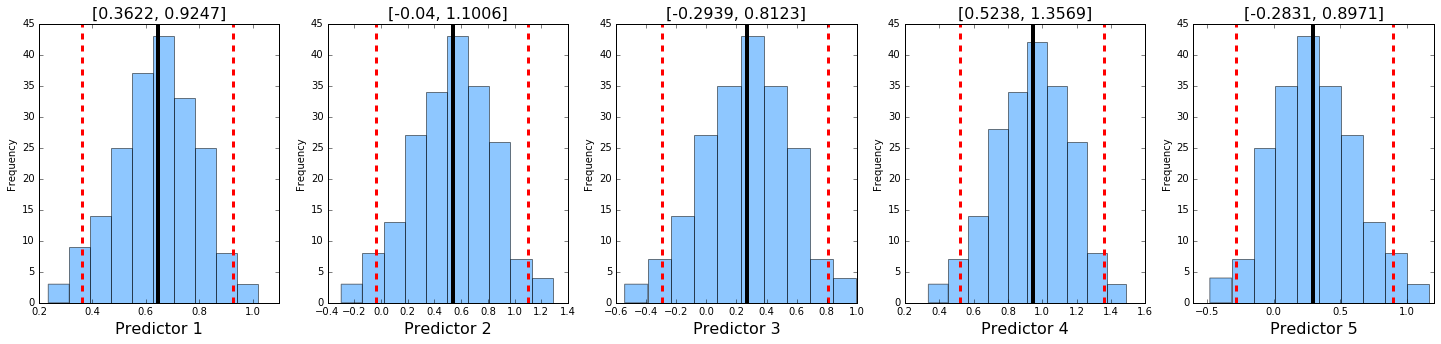

In [6]:
# Load train set
data = np.loadtxt("dataset_2.txt", delimiter=',', skiprows = 1)

# Size of data set, and subsample (10%)
x = data[:, :-1]
y = data[:, -1]

# Record size of the data set
n = x.shape[0]
d = x.shape[1]
subsample_size = 100

# No. of subsamples
num_samples = 200
    
### Linear regression with all 5 predictors

# Create a n x d array to store coefficients for 100 subsamples
coefs_multiple = np.zeros((num_samples, d))

print 'Linear regression with all predictors'

# Repeat for 200 subsamples
for i in range(num_samples):
    # Generate a random subsample of 50 data points
    perm = np.random.permutation(n) # Generate a list of indices 0 to n and permute it
    x_subsample = x[perm[:subsample_size], :] # Get x-vals for the first 50 indices in permuted list
    
    y_subsample = y[perm[:subsample_size]] # Get y-vals for the first 50 indices in permuted list

    # Fit linear regression model on subsample
    w, c = multiple_linear_regression_fit(x_subsample, y_subsample)
    # Store the coefficient for the model we obtain
    coefs_multiple[i, :] = w

# Plot histogram of coefficients, and report their confidence intervals 
fig, axes = plt.subplots(1, d, figsize=(25, 5))

# Repeat for each coefficient
for j in range(d):
    # Compute mean for the j-th coefficent from subsamples
    coef_j_mean = np.mean(coefs_multiple[:, j])
    
    # Compute confidence interval at 95% confidence level (use formula!)
    conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
    conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)
       
    # Plot histogram of coefficient values
    axes[j].hist(coefs_multiple[:, j], color='dodgerblue', alpha=0.5)

    # Plot vertical lines at mean and left, right extremes of confidence interval
    axes[j].axvline(x = coef_j_mean, linewidth=4, c='k')
    axes[j].axvline(x = conf_int_left, linewidth=3, linestyle='--', c='r')
    axes[j].axvline(x = conf_int_right, linewidth=3, linestyle='--', c='r')
    
    # Set plot labels
    axes[j].set_title('[' + str(round(conf_int_left, 4)) 
                      + ', ' 
                      + str(round(conf_int_right, 4)) + ']', fontsize=16)
    axes[j].set_xlabel('Predictor ' + str(j + 1), fontsize=16)
    axes[j].set_ylabel('Frequency')

plt.show()

In [33]:
data = np.loadtxt("dataset_2.txt", delimiter=',', skiprows = 1)

# Size of data set, and subsample (10%)
x = data[:, :-1]
y = data[:, -1]

# Add column of ones to x matrix
x1 = sm.add_constant(x)

# Create model for linear regression
model = sm.OLS(y, x1)
# Fit model
fitted_model = model.fit()
# The confidence intervals for our five coefficients are contained in the last five
# rows of the fitted_model.conf_int() array
conf_int = fitted_model.conf_int()[1:, :]

for j, th in zip(range(0,d), ('st', 'nd', 'rd', 'th', 'th') ):
    print '95% CI for the', str(j+1) + th, 'coefficient: [', round(conf_int[j][0], 4), ',', round(conf_int[j][1],4), ']'

95% CI for the 1st coefficient: [ 0.5528 , 0.7504 ]
95% CI for the 2nd coefficient: [ 0.3522 , 0.7497 ]
95% CI for the 3rd coefficient: [ 0.0889 , 0.4734 ]
95% CI for the 4th coefficient: [ 0.8098 , 1.0985 ]
95% CI for the 5th coefficient: [ 0.0785 , 0.4884 ]


Although both methods provide very similar estimates for each coefficient, the bootstrap method has substantially wider confidence intervals. This makes sense because the samples from the bootstrap method are significantly smaller than the training sample size (n=100 vs. n=1000). In particular, the standard error is proportional to $\frac{1}{\sqrt{n}}$. If our bootstrap samples were of the same size of the training sample, then we would expect the confidence intervals to be very close to each other. 

## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

In [8]:
# k = degree of polynomial
def polynomial_regression_fit(x_train, y_train, k):

    n = x_train.shape[0]

    #Create X matrix, where each row consists of xi raised to the 0,1,...,kth power
    X = np.zeros((n, k+1))
    for i in range(n):
        for j in range(k+1):
            X[i,j] = x_train[i]**j 

    # Compute transpose of x
    X_trans = np.transpose(X)

    # Compute intermediate term: inv(x^T * x)
    Xt_X_inv = np.linalg.pinv(np.dot(X_trans, X))
    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(Xt_X_inv, X_trans), y_train)
    
    return w

In [9]:
# k = degree of polynomial
# w = polynomial coefficients
def polynomial_regression_predict(w, k, x_test):

    n = x_test.shape[0]

    #Create X matrix, where each row consists of xi raised to the 0,1,...,kth power
    X = np.zeros((n, k+1))
    for i in range(n):
        for j in range(k+1):
            X[i,j] = x_test[i]**j 

    # Compute transpose of W
    W_trans = np.transpose(w)
    
    # Y = XW^T
    y_pred = np.dot(X, W_trans)
    
    return y_pred

In [10]:
def polynomial_regression_score(y_pred, y_test):        
    
    # Evaluate squared error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = round(np.sum(np.square(y_test - y_pred)), 5)
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_sq = round(1 - (sq_error / y_variance), 3)

    return {'R-sq': r_sq, 'RSS': sq_error} 

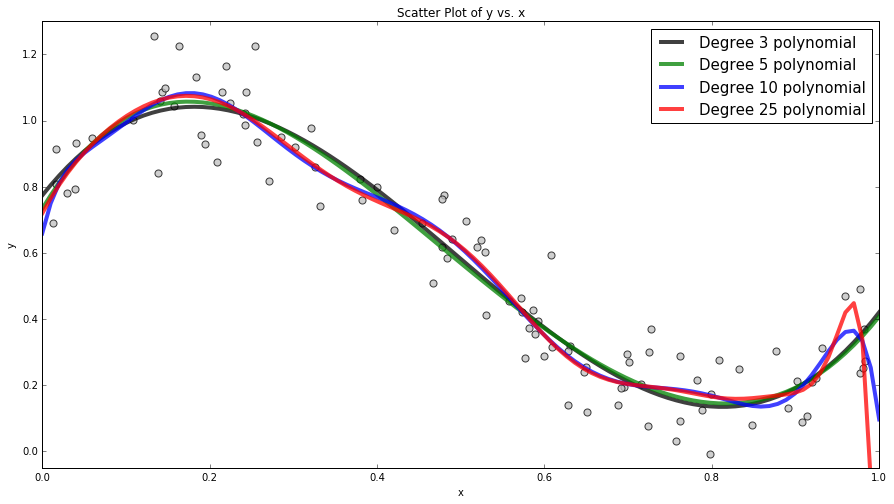

In [18]:
data = np.loadtxt('dataset_3.txt', delimiter=',', skiprows=1)

x_train = data[:, :-1]
y_train = data[:, -1]

fig, ax1 = plt.subplots(1, 1, figsize=(15, 8))

ax1.scatter(x_train, y_train, s=50, c='silver', alpha = .75)

ax1.set_title('Scatter Plot of y vs. x') 
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim(0, 1)
ax1.set_ylim(-.05, 1.3)

x = np.linspace(0,1,100) #create sequence of 100 numbers between 0 and 1 

d={}
for k, col, l in zip((3,5,10,25), ('k','g','b','r'), range(1,5)):

    w = polynomial_regression_fit(x_train, y_train, k)
    y_pred = polynomial_regression_predict(w, k, x_train)
    p = np.poly1d(w[::-1]) #w[::-1] reverses order of coefficients
    

    d['line{0}'.format(l)], = ax1.plot(x, p(x), col, linewidth=4, label='Degree ' + str(k) + ' polynomial', alpha=.75)

plt.legend(handles = [d['line1'], d['line2'], d['line3'], d['line4']], prop={'size':15})

plt.show()

Based on the graph, it appears that the degree 10 and the degree 25 polynomial are overfitting the data. But measuring the fit on testing data would give us a better indication of that.

###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

Degree 1 poly on train R-sq:  0.747
Degree 1 poly on test R-sq: 0.753
Degree 2 poly on train R-sq:  0.759
Degree 2 poly on test R-sq: 0.753
Degree 3 poly on train R-sq:  0.913
Degree 3 poly on test R-sq: 0.925
Degree 4 poly on train R-sq:  0.918
Degree 4 poly on test R-sq: 0.916
Degree 5 poly on train R-sq:  0.919
Degree 5 poly on test R-sq: 0.917
Degree 6 poly on train R-sq:  0.919
Degree 6 poly on test R-sq: 0.917
Degree 7 poly on train R-sq:  0.919
Degree 7 poly on test R-sq: 0.917
Degree 8 poly on train R-sq:  0.922
Degree 8 poly on test R-sq: 0.916
Degree 9 poly on train R-sq:  0.922
Degree 9 poly on test R-sq: 0.913
Degree 10 poly on train R-sq:  0.922
Degree 10 poly on test R-sq: 0.915
Degree 11 poly on train R-sq:  0.93
Degree 11 poly on test R-sq: 0.916
Degree 12 poly on train R-sq:  0.929
Degree 12 poly on test R-sq: 0.918
Degree 13 poly on train R-sq:  0.928
Degree 13 poly on test R-sq: 0.92
Degree 14 poly on train R-sq:  0.929
Degree 14 poly on test R-sq: 0.916
Degree 15 po

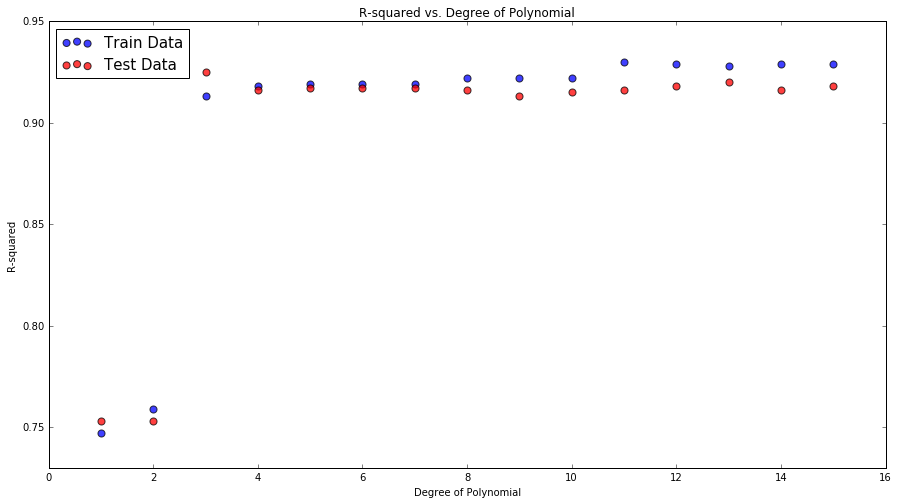

In [23]:
data = np.loadtxt('dataset_3.txt', delimiter=',', skiprows=1)
n = len(data)

#ind = np.random.permutation(n)
#test = data[ind[:n/2], :]
#train = data[ind[n/2:], :]

train = data[:n/2, :]
test = data[n/2:, :]

x_train = train[:,0]
y_train = train[:,1]
x_test = test[:,0]
y_test = test[:,1]


Train_R_sq=[]
Test_R_sq=[]

for k in range(1,16):
    w = polynomial_regression_fit(x_train, y_train, k)
    
    y_pred1 = polynomial_regression_predict(w, k, x_train)
    print 'Degree ' + str(k) + ' poly on train R-sq: ', polynomial_regression_score(y_pred1, y_train)['R-sq']
    Train_R_sq.append(polynomial_regression_score(y_pred1, y_train)['R-sq'])
    
    y_pred2 = polynomial_regression_predict(w, k, x_test)
    print 'Degree ' + str(k) + ' poly on test R-sq:', polynomial_regression_score(y_pred2, y_test)['R-sq']
    Test_R_sq.append(polynomial_regression_score(y_pred2, y_test)['R-sq'])


k = range(1,16)
fig, ax1 = plt.subplots(1, 1, figsize=(15, 8))

trainr = ax1.scatter(k, Train_R_sq, s=50, c='b', alpha = .75)
testr = ax1.scatter(k, Test_R_sq, s=50, c='r', alpha = .75)
ax1.legend((trainr, testr), ("Train Data", "Test Data"), prop={'size':15}, loc=2)

ax1.set_title('R-squared vs. Degree of Polynomial') 
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('R-squared')
ax1.set_ylim(.73, .95)
plt.show()

For the *training data*, as the degree increases, in general, R-squared increases as well. This makes sense because polynomials of higher and higher degree are more flexible and can fit more of the data, even if it is just noise. In this case, the degree 11 polynomial is the one with the highest training R-squared (R-sq = .93).

One the other hand, the polynomials with the highest *test* R-squared values are the degree 3 (R-sq = .925). For the polynomials of higher degrees, the test R-squared values are, in genereal, steadily decreasing despite the fact that they are increasing for the training data. This is most likely due to overfitting, and thus is good example of the importance of splitting your data into training and testing data to properly assess the goodness of fit of your model. So the best polynomial to model the data based on the test R-squared is a polynomial of degree 3.

## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

AIC:  [-174.4, -174.9, -223.8, -225.0, -223.1, -221.1, -219.2, -219.1, -217.4, -215.3, -218.6, -215.9, -213.4, -212.3, -209.8]
BIC:  [-172.5, -171.1, -218.1, -217.4, -213.6, -209.7, -205.8, -203.8, -200.2, -196.2, -197.6, -193.0, -188.5, -185.5, -181.1]


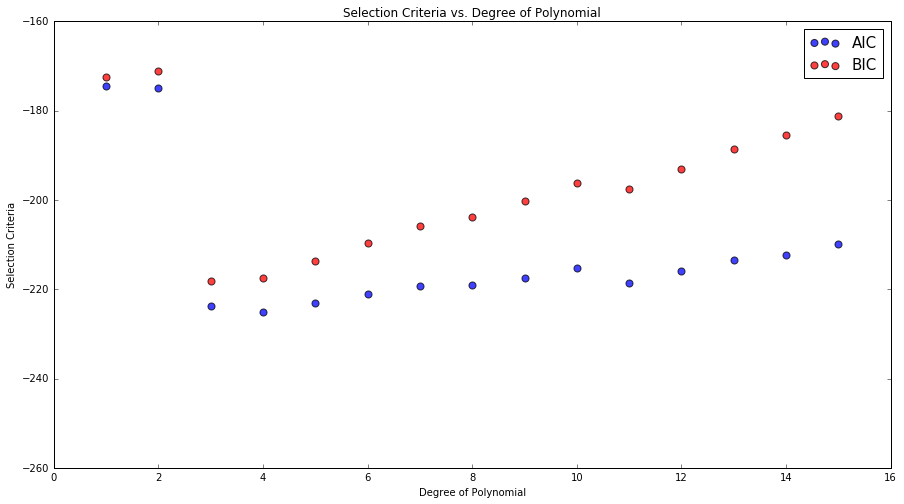

In [24]:
n = len(x_train)

AIC = []
BIC = []

for k in range(1,16):
    w = polynomial_regression_fit(x_train, y_train, k)
    y_pred = polynomial_regression_predict(w, k, x_train)

    RSS = polynomial_regression_score(y_pred, y_train)['RSS']
    AIC.append(round((n*np.log(RSS/n) + 2*k), 1))
    BIC.append(round((n*np.log(RSS/n) + np.log(n)*k), 1))

print 'AIC: ', AIC
print 'BIC: ', BIC

k = range(1,16)
fig, ax1 = plt.subplots(1, 1, figsize=(15, 8))

aic = ax1.scatter(k, AIC, s=50, c='b', alpha = .75)
bic = ax1.scatter(k, BIC, s=50, c='r', alpha = .75)

ax1.legend((aic, bic), ("AIC", "BIC"), prop={'size':15})
ax1.set_title('Selection Criteria vs. Degree of Polynomial') 
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('Selection Criteria')
ax1.set_ylim(-260, -160)
plt.show()

The polynomial with the smallest AIC value is the degree 4 polynomial with AIC = -225. In which case, the model chosen by the criteria is not the same as the model with the largest test R-squared, but it is very close. However, the polynomial with the smallest BIC value is the degree 3 polynomial with BIC = -218.1, which is the same model as the one with the largest test R-squared. It makes sense that BIC would pick the simpler model because BIC has a heavier penalty for model size than AIC.

### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.

The data set for this problem can be downloaded from the following URL: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv. The file contains the details of all pickups by Green cabs in New York City during January 2015. 

In [54]:
data = pd.read_csv('tripdata.csv', usecols=[1], header=None) #Header is causing problems

#Convert to datetime format, then set as index so we can extract the hour, minute, etc.
data.columns=['date_time']
date_time = pd.to_datetime(data.iloc[:,0][1:len(data)])
data2 = pd.DataFrame(index=date_time)
data2['ind'] = range(len(date_time)) 
data2['hour'] = data2.index.hour
data2['minute'] = data2.index.minute

#Convert time to minutes, where 0 is midnight
data2['time'] = np.array(data2['hour'])*60 + np.array(data2['minute'])

#Find how many pick ups there are at any given time
#Since we have 31 days worth of data, divide by 31 to get the average count per day 
min_in_day = 24*60
count = [-1]*min_in_day
for i in range(min_in_day):
    count[i] = len(data2['time'][data2['time'] == i])/31.  

AIC:  [6080.5, 5948.8, 4357.8, 4324.7, 4070.7, 4072.4, 3073.7, 3055.5, 2511.7, 2418.6, 2417.5, 1932.2, 1748.3, 1393.7, 1139.6, 1141.6, 1098.4, 814.2, 975.4, 904.9, 963.3, 963.1, 1279.3, 1018.9, 1730.1, 2083.2, 2069.9, 2532.2, 2889.7]
BIC:  [6085.8, 5959.4, 4373.6, 4345.8, 4097.1, 4104.1, 3110.6, 3097.6, 2559.1, 2471.3, 2475.5, 1995.4, 1816.8, 1467.5, 1218.7, 1225.9, 1188.0, 909.2, 1075.5, 1010.4, 1074.1, 1079.1, 1400.5, 1145.4, 1861.9, 2220.3, 2212.3, 2679.8, 3042.6]


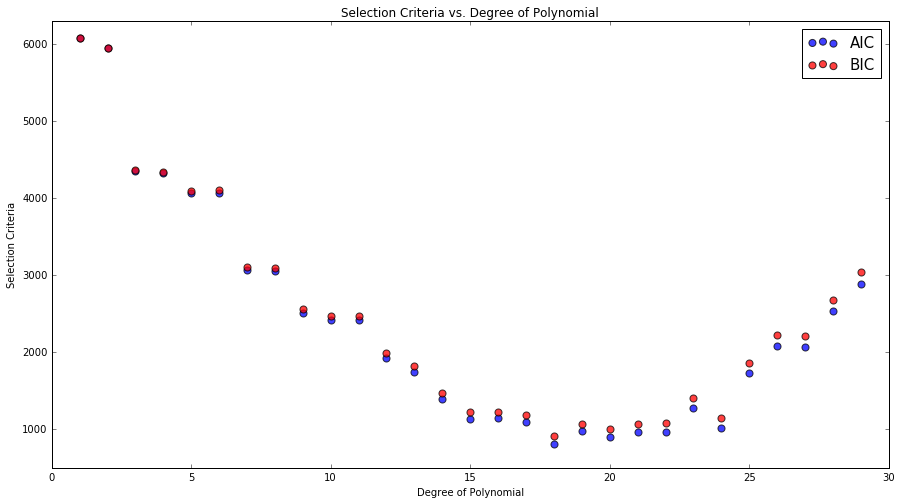

In [60]:
time_minutes = range(min_in_day)

#The polynomial functions that we created are not behaving well for our data
#So we will standardize our time variable by subtracting the mean and dividing by the standard deviation
time_minutes = np.asarray(time_minutes)
time_minutes_std = (time_minutes-np.mean(time_minutes))/np.std(time_minutes, ddof=1)

#We will use AIC and BIC in order to determine the best degree polynomial to model this data
n = len(time_minutes_std)

AIC = []
BIC = []

for k in range(1,30):
    w = polynomial_regression_fit(time_minutes_std, count, k)
    y_pred = polynomial_regression_predict(w, k, time_minutes_std)

    RSS = polynomial_regression_score(y_pred, count)['RSS']
    AIC.append(round(n*np.log(RSS/n) + 2*k, 1) )
    BIC.append( round(n*np.log(RSS/n) + np.log(n)*k, 1) )

print 'AIC: ', AIC
print 'BIC: ', BIC

k = range(1,30)
fig, ax1 = plt.subplots(1, 1, figsize=(15, 8))

aic = ax1.scatter(k, AIC, s=50, c='b', alpha = .75)
bic = ax1.scatter(k, BIC, s=50, c='r', alpha = .75)

ax1.legend((aic, bic), ("AIC", "BIC"), prop={'size':15})
ax1.set_title('Selection Criteria vs. Degree of Polynomial') 
ax1.set_xlabel('Degree of Polynomial')
ax1.set_ylabel('Selection Criteria')
ax1.set_xlim(0, 30)
ax1.set_ylim(500, 6300)
plt.show()

The model that minimizes both AIC and BIC is the degree 18 polynomial, so that is the one we will choose to model our data.

R-squared = 0.989


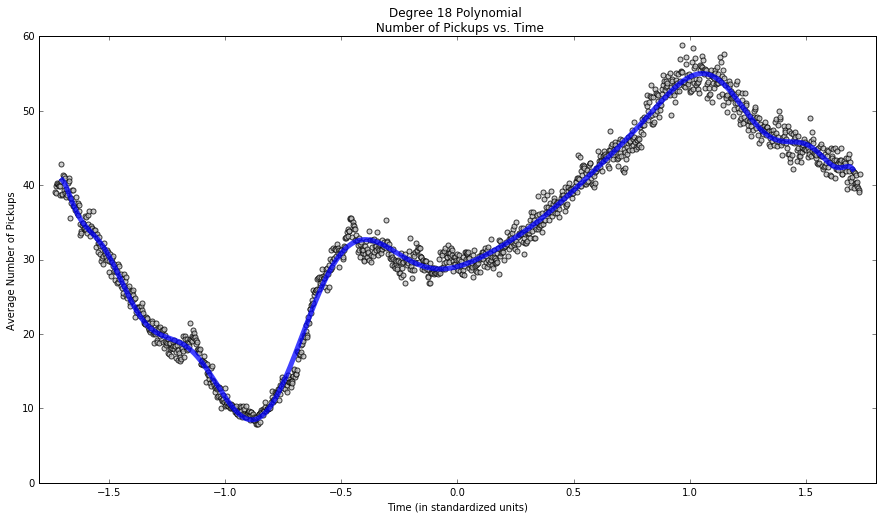

In [72]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 8))

ax1.scatter(time_minutes_std, count, s=25, c='silver', alpha = .75)

ax1.set_title('Degree 18 Polynomial \n Number of Pickups vs. Time') 
ax1.set_xlabel('Time (in standardized units)')
ax1.set_ylabel('Average Number of Pickups')
ax1.set_xlim(-1.8, 1.8)
ax1.set_ylim(0, 60)

x = np.linspace(-1.7,1.7,1000) 
w = polynomial_regression_fit(time_minutes_std, count, 18)
y_pred = polynomial_regression_predict(w, 18, time_minutes_std)
print 'R-squared =', polynomial_regression_score(y_pred, count)['R-sq']

p = np.poly1d(w[::-1])
ax1.plot(x, p(x), linewidth=5, alpha=.75)
plt.show()

As we can see, the model fits the data very well (R-sq = .99), and since there is very little noise in the data, and this model is the one with the smallest AIC and BIC, which serves as a proxy for the test error, we have no reason to believe that we are overfitting the data. 